In svg mode, plots don't work without `legend` in octave 4.2. In ubuntu 18.10 no need for this.
Use `jupyplot` after `plot()` with optional formatting options in it

In [1]:
%plot -f svg -s800,300

### Plots with multiple figures are in the reverse order

## Introduction
We have observed data 

## Comparison of partial vs avg

We load the data

In [2]:
multi_globals
type, p, method, rho, N, M

type = meyer
p =  3
method = hard
rho =  1
N =  1024
M =  15


### Load the data 
with same noise and same impulse response

In [3]:
multi_data_same

sigma =  11


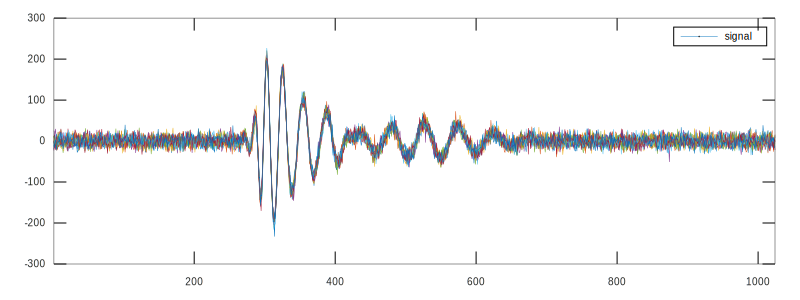

In [20]:
plot(wax'); plotsig

###  `fft()` of a matrix is computed column-wise
So, we need to take transpose before computing the fft and then transpose it back later to be consistent with our convention.

In [9]:
% Fourier transform
f_wax = fft(wax')';
f_aximp = fft(aximp')';
f_ori = fft(testyori);
noise_sd = std(noiseax);

% wavelet transform of the original signal
w_ori = wtrans(testyori, type, p);

In [6]:
w = multi_fw_par_new(f_wax, f_aximp, f_ori, noise_sd, zeros(1,4)+0.1);

unthresholded: 409 	 total: 512 	 ratio_unthresholded: 0.798828
unthresholded: 174 	 total: 256 	 ratio_unthresholded: 0.679688
unthresholded: 103 	 total: 128 	 ratio_unthresholded: 0.804688
unthresholded: 109 	 total: 128 	 ratio_unthresholded: 0.851562


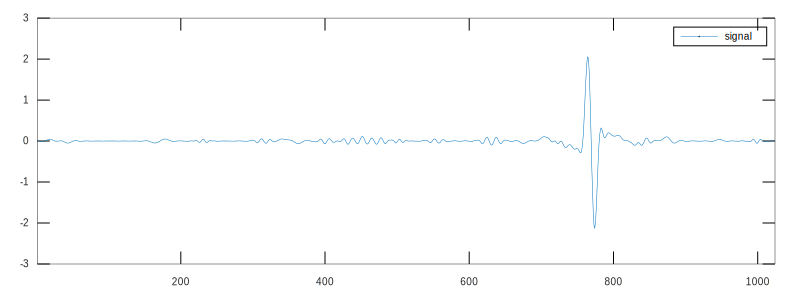

In [31]:
plot(iwtrans(w, type, p)); plotsig('signal')

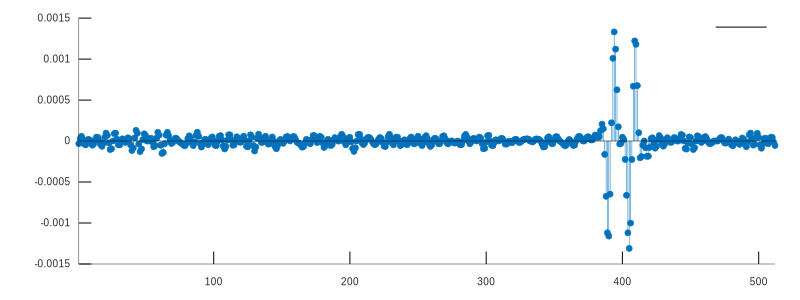

In [42]:
[w_typical, first_unthresratio, first_thresval] = multi_fw_par_level(f_wax, f_aximp, f_ori, noise_sd, 0.5, 1);
stem(w_typical,'.'); jupyplot; axis([1 length(w_typical)])

In [9]:
w = multi_fw_par_full(f_wax, f_aximp, f_ori, noise_sd, zeros(1,4)+1);

ratiounthres =  0.81641
ratiounthres =  0.61719
ratiounthres =  0.67969
ratiounthres =  0.82812


### Now working with a single signal deconvolution

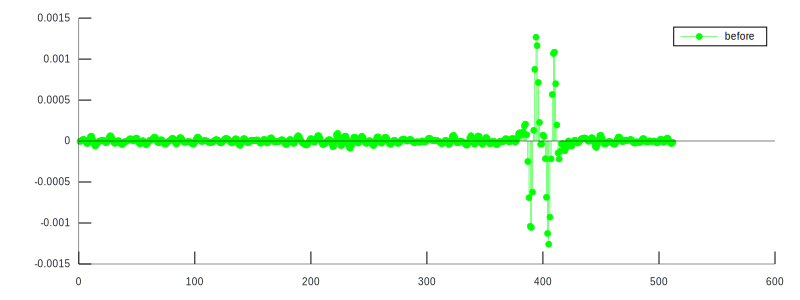

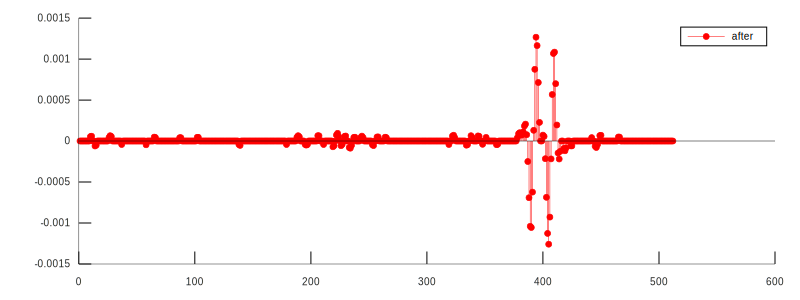

In [43]:
ind = 1;  % choosing the first signal
[w_typical, first_unthresratio, first_thresval] = multi_fw_one_level(f_wax(ind,:), f_aximp(ind,:), f_ori, noise_sd(ind), 0.9, 1);

ratiounthres =  0.22266
ratiounthres =  0.21094
ratiounthres =  0.21875
ratiounthres =  0.22656


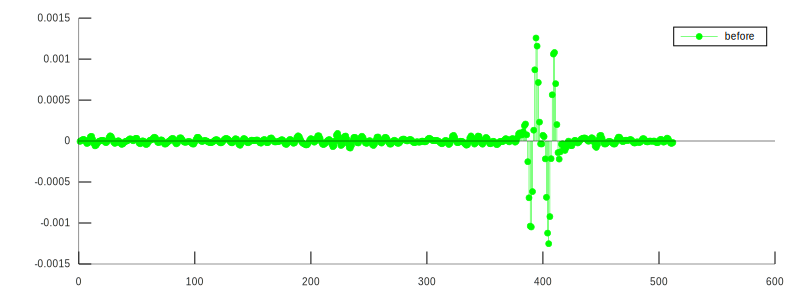

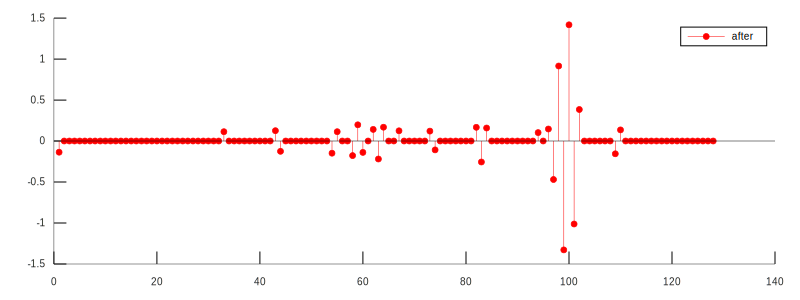

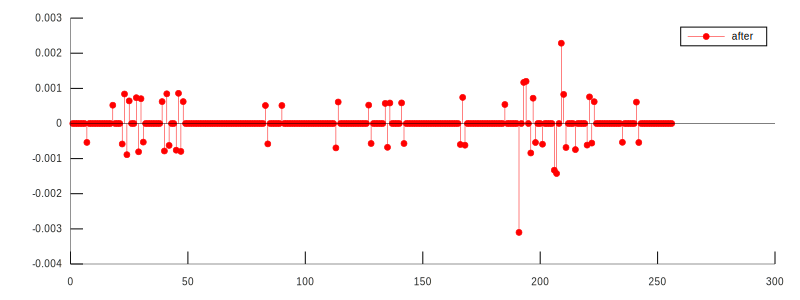

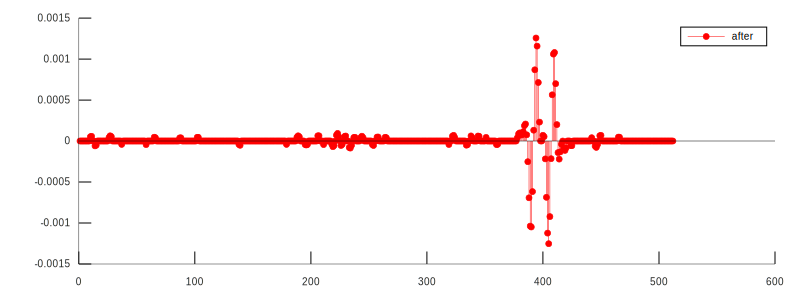

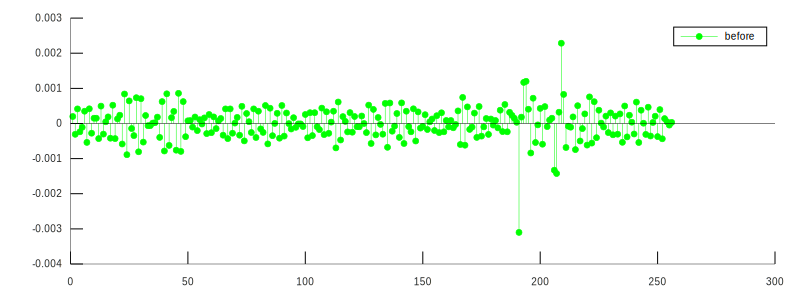

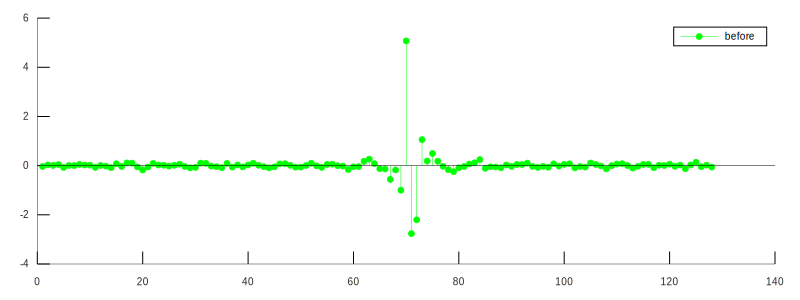

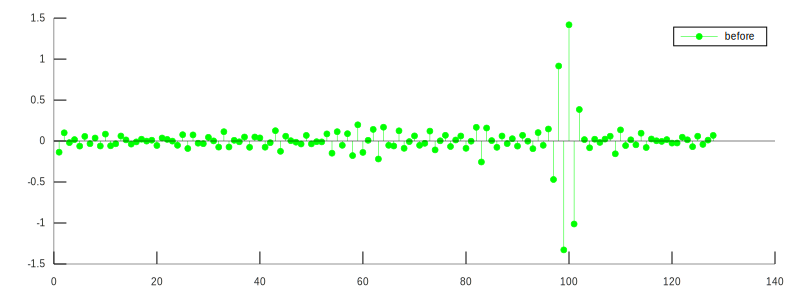

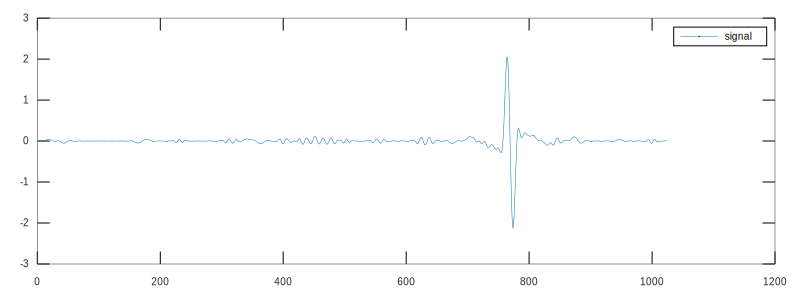

In [44]:
# full wavelet deconvolution
w = multi_fw_one_full(f_wax(ind,:), f_aximp(ind,:), f_ori, noise_sd(ind), zeros(1,4)+1);
plot(iwtrans(w, type, p)); legend('signal')

## Error analysis
Since the the $l^2$ error for the $j$-th level wavelet coefficients independent of the regularization parameter for other levels, **(Verify)** we can plot the error with respect to the regularization parameter.

In [7]:
level_now = 2;

In [6]:
alphavals = 0.1:0.1:1;

In [10]:
errvals = zeros(1,length(alphavals));

tic
counter = 1;
for alpha=alphavals
    [w_level, first_unthresratio, first_thresval] = multi_fw_par_level(f_wax, f_aximp, f_ori, noise_sd, alpha, level_now);
    
    % getting the corresponding wavelet coefficients of the original signal
    [starting, ending] = getindex(N,p,level_now);
    w_ori_level = w_ori(starting:ending);
    
    % All are scaled, but variable for signal or level
    %%computing the relative error
    %errvals(counter) = rele(w_level,w_ori_level);
    %% computing the mean error
    %errvals(counter) = norm(w_level-w_ori_level,2)/length(w_level);
    % computing the l^2 error
    errvals(counter) = norm(w_level - w_ori_level,2);
    counter ++;
end
toc

Elapsed time is 0.300532 seconds.


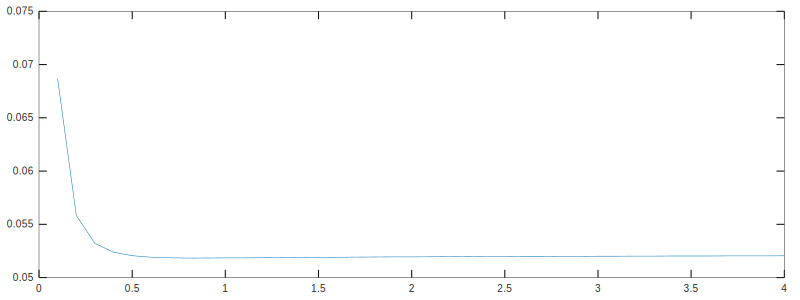

In [25]:
errvals_par = multi_error_level('par',f_wax, f_aximp, f_ori, w_ori, noise_sd, alphavals, level_now);

#### Find the best alpha

In [29]:
alphavals(find(errvals_par == min(errvals_par)))

ans =  0.80000


### Why does this *not* have any local min?

In [11]:
alphavals = 0.1:0.01:0.5;
%alphavals = 0.0001:0.001:0.5;
for j=1:p+1
    figure;
    tic
    multi_error_level('par',f_wax, f_aximp, f_ori, w_ori, noise_sd, alphavals, j);
    toc
end

Elapsed time is 0.991887 seconds.
Elapsed time is 0.972084 seconds.
Elapsed time is 1.00759 seconds.
Elapsed time is 1.23963 seconds.


no element found: line 1, column 0
no element found: line 1, column 0
no element found: line 1, column 0
no element found: line 1, column 0


### Now plotting the error for a single signal

In [16]:
levelnow = 2
alphavals = 0.3:001:3;

levelnow =  2


Elapsed time is 4.74132 seconds.


no element found: line 1, column 0


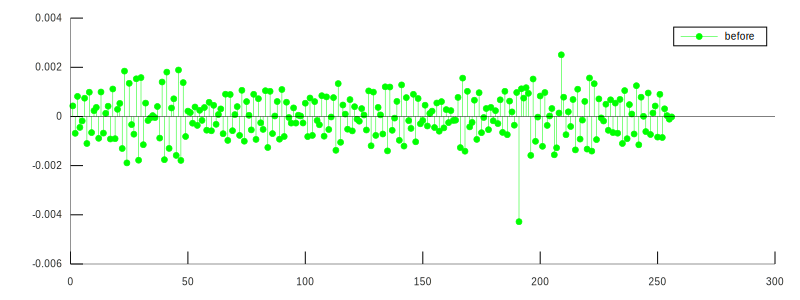

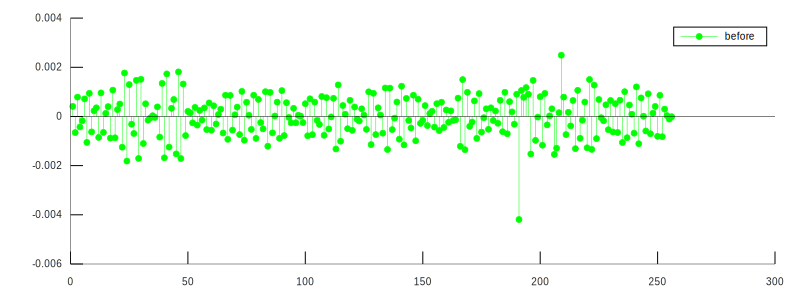

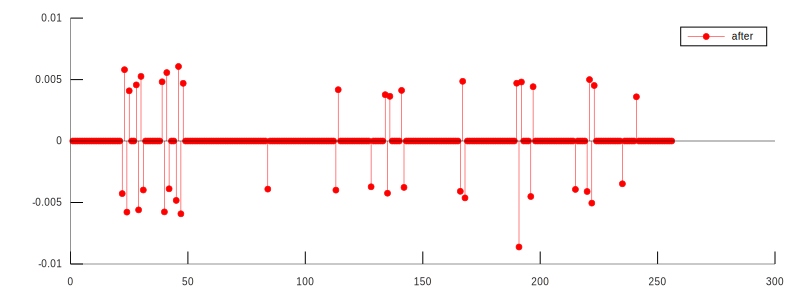

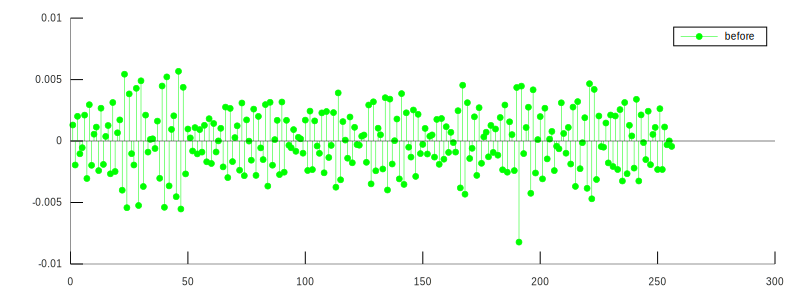

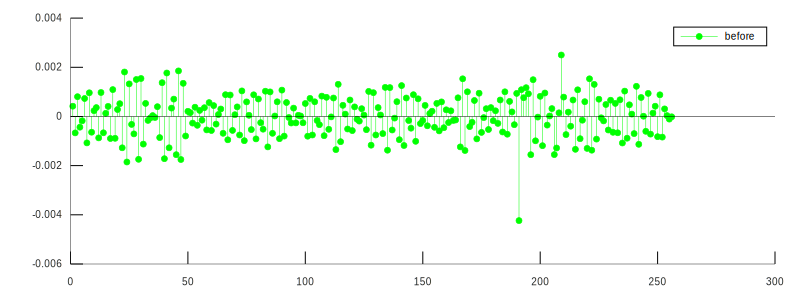

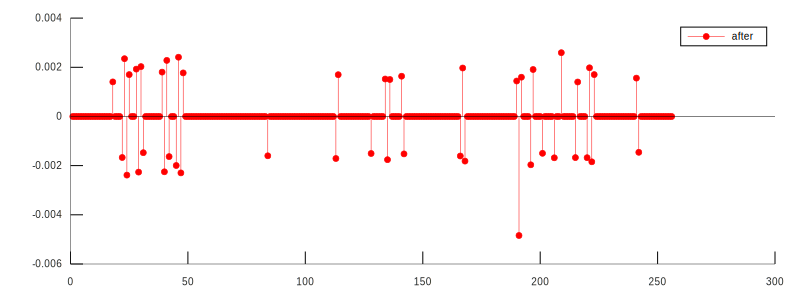

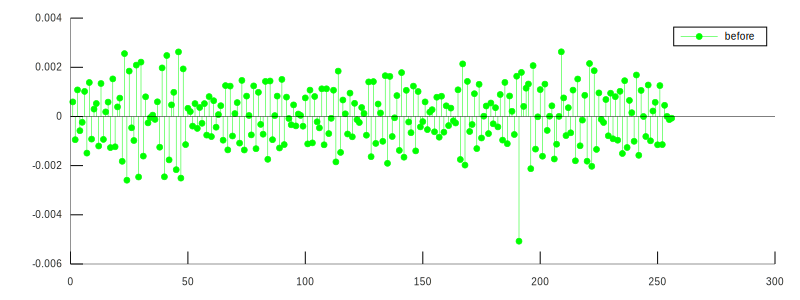

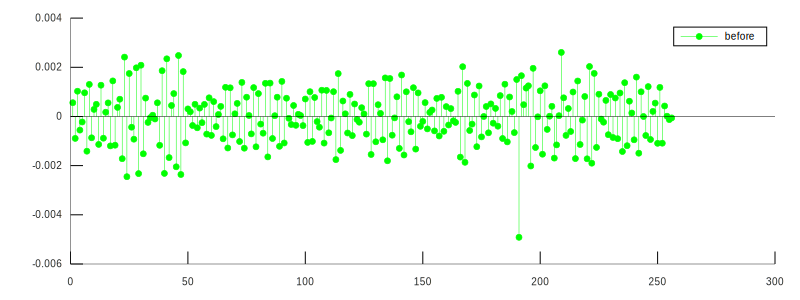

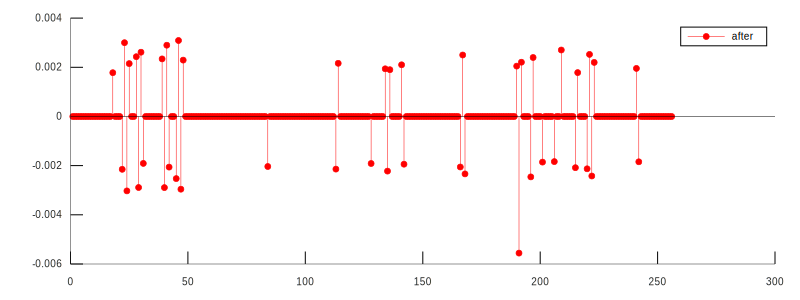

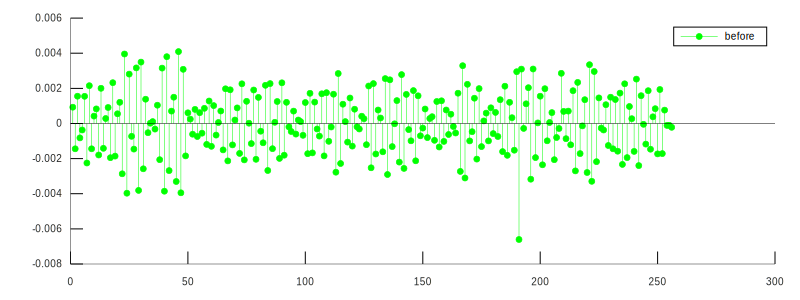

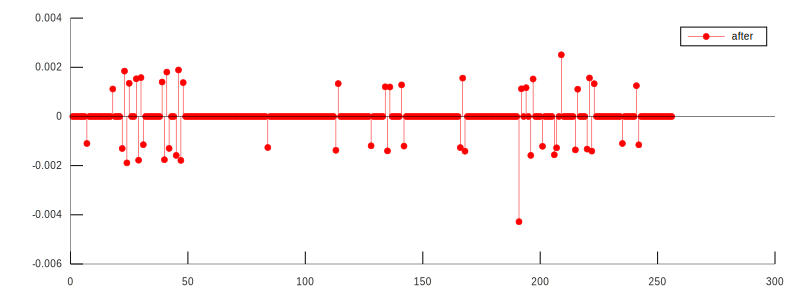

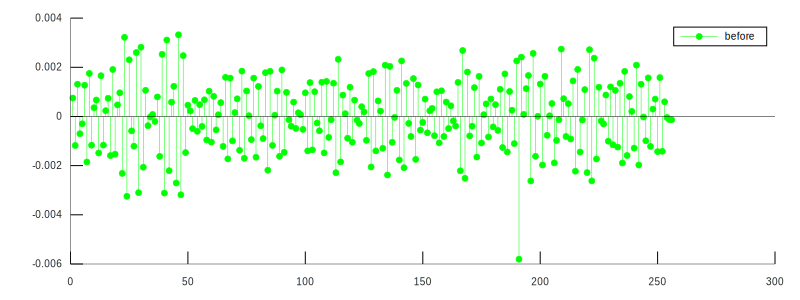

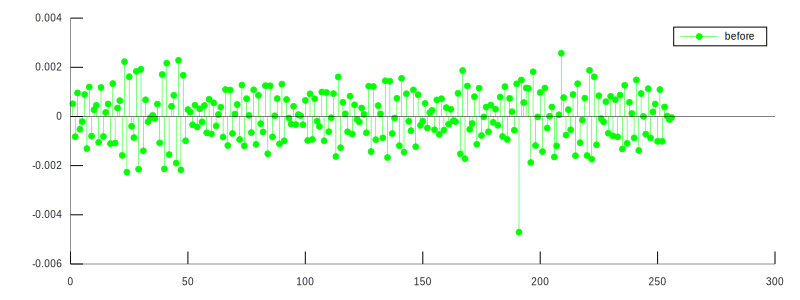

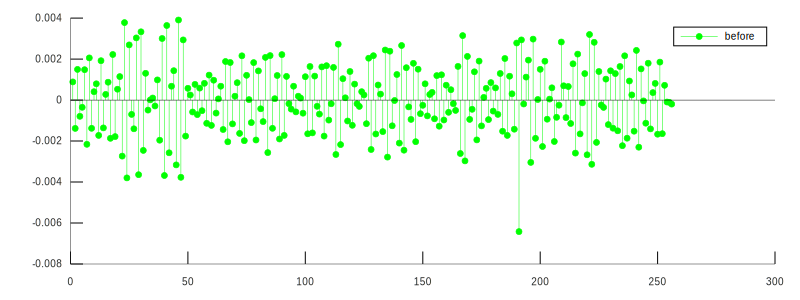

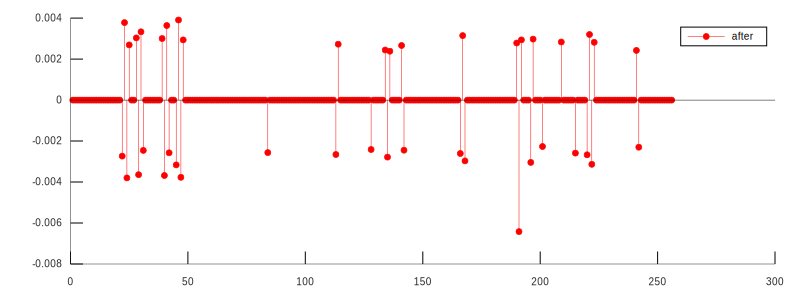

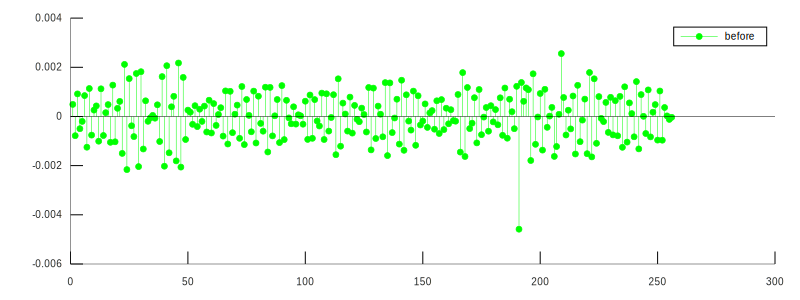

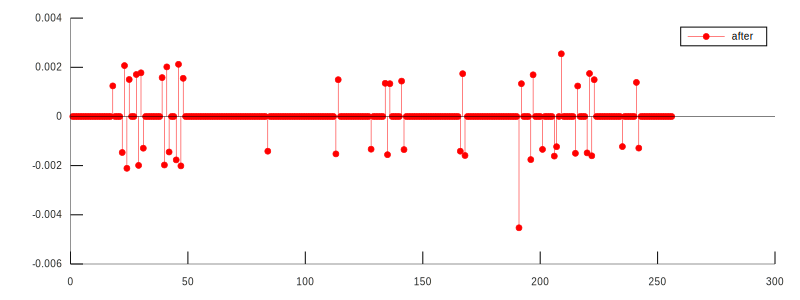

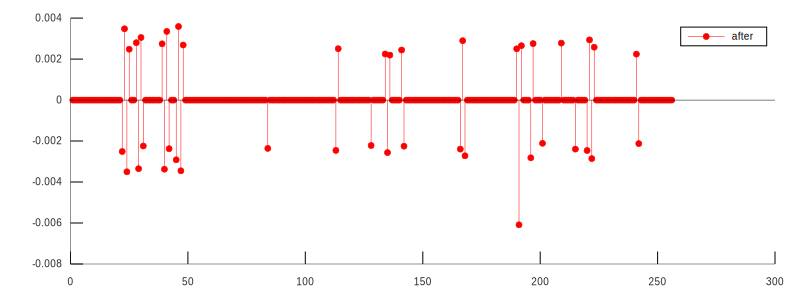

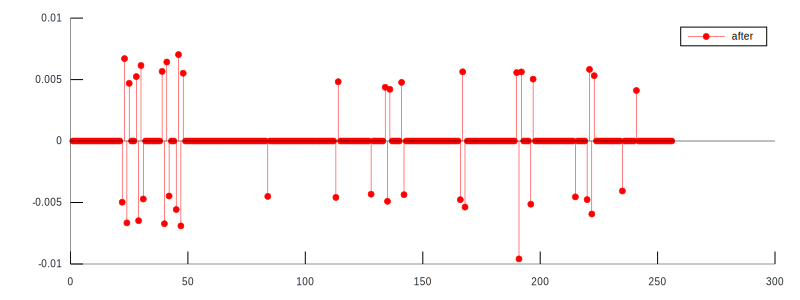

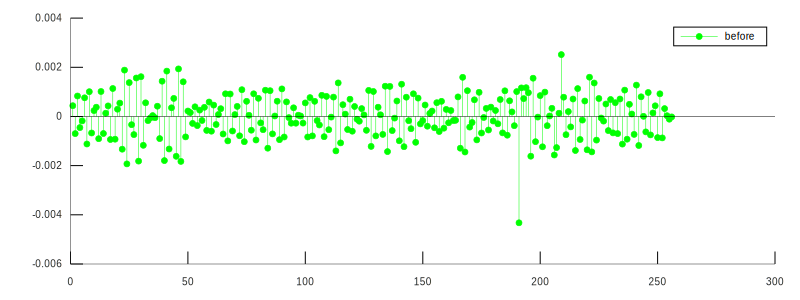

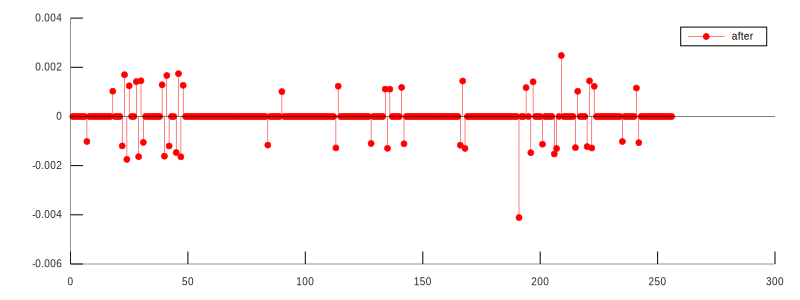

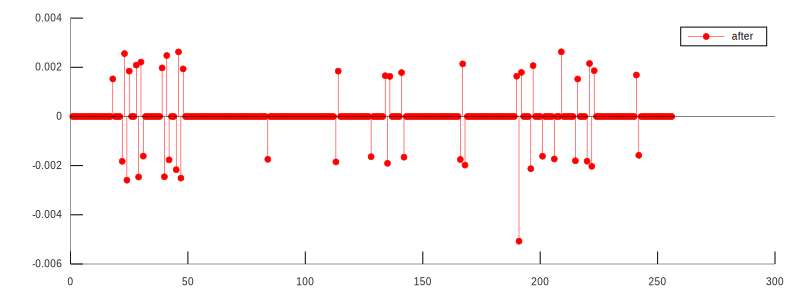

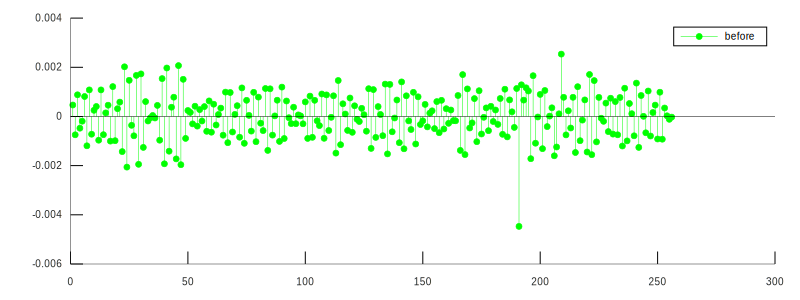

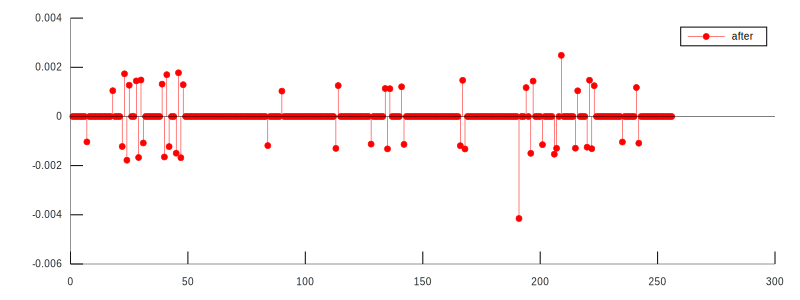

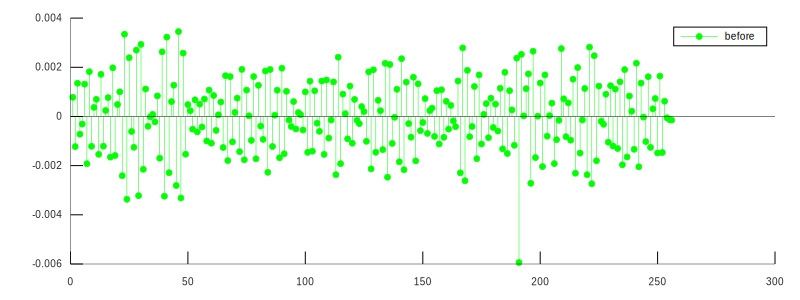

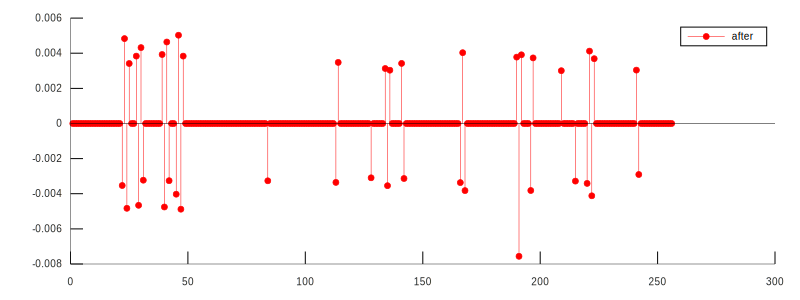

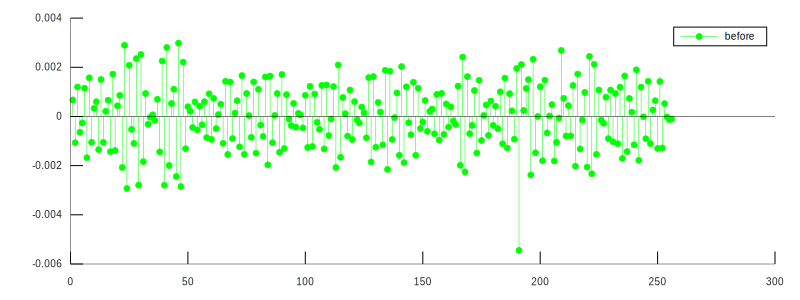

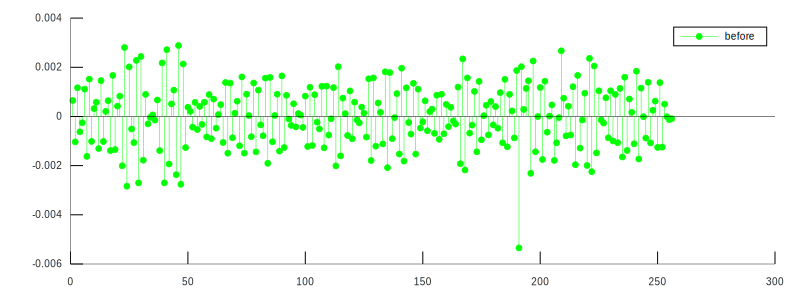

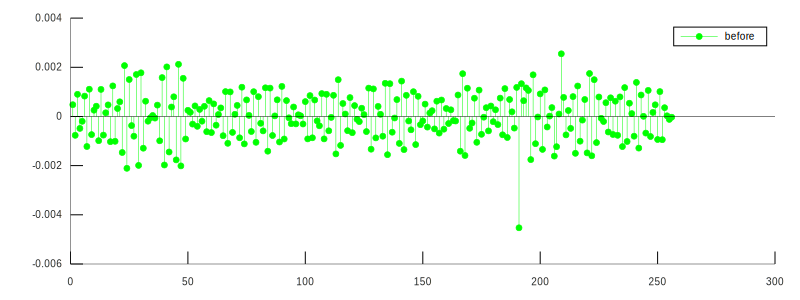

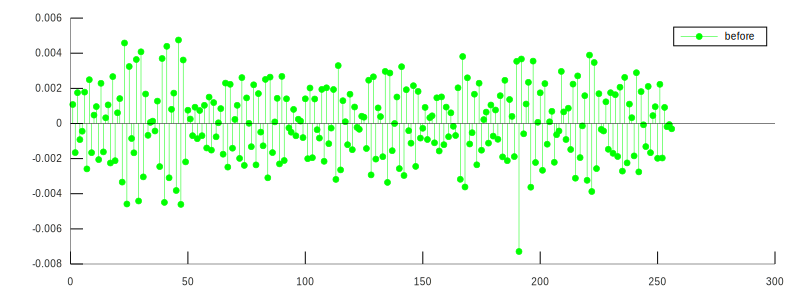

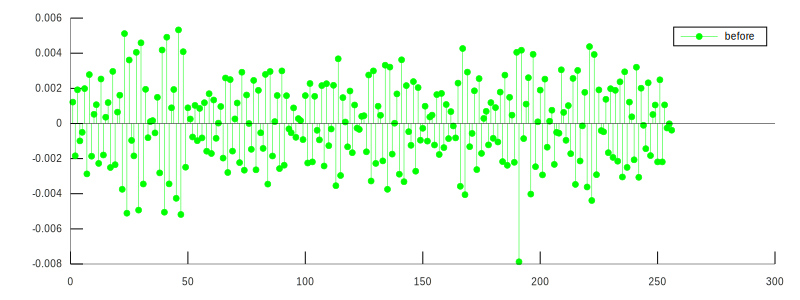

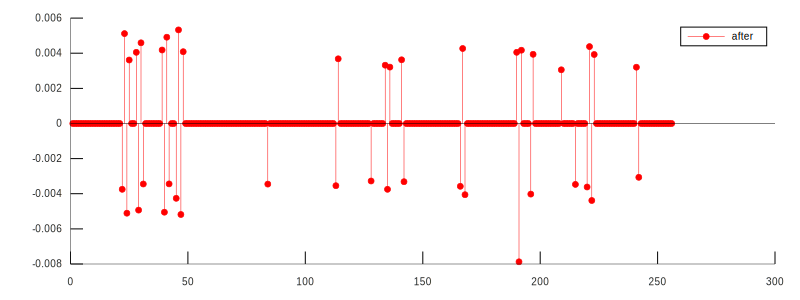

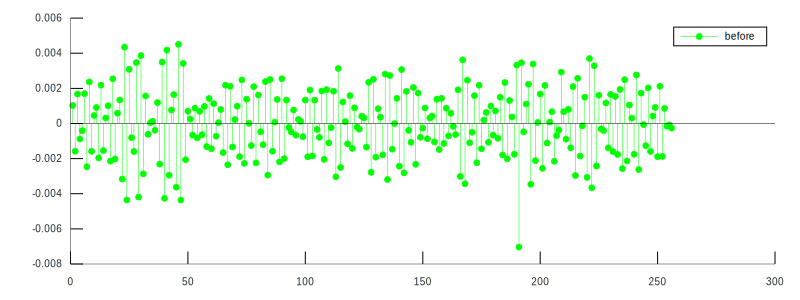

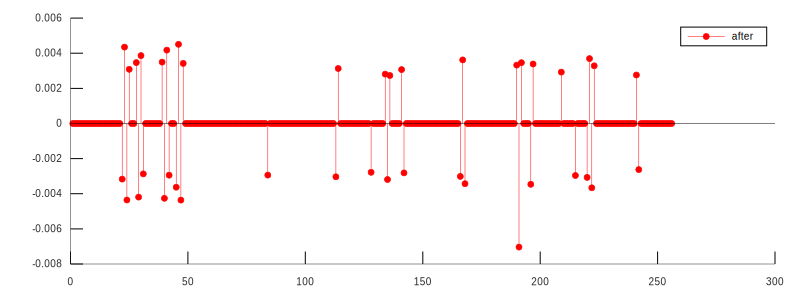

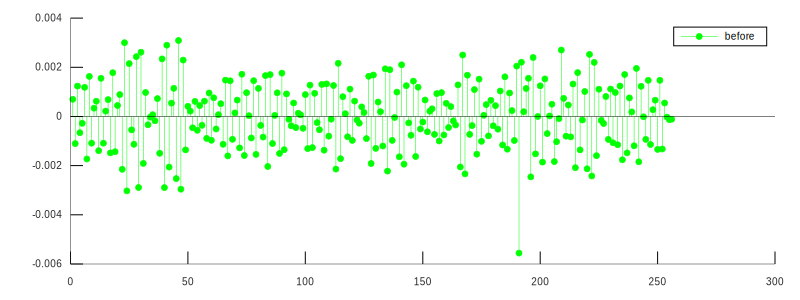

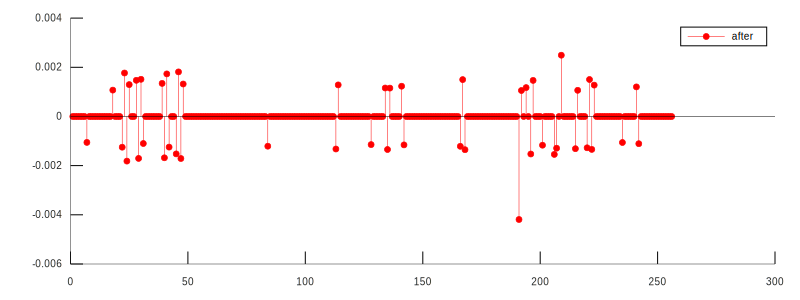

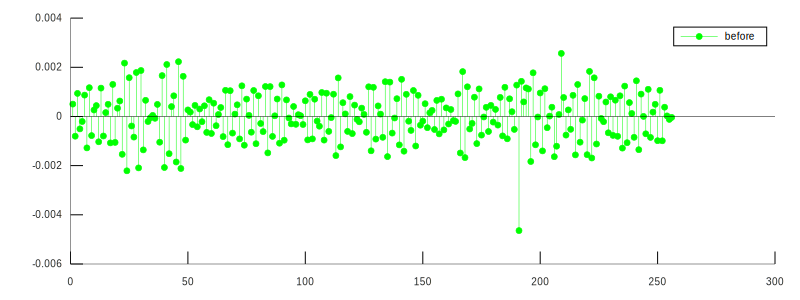

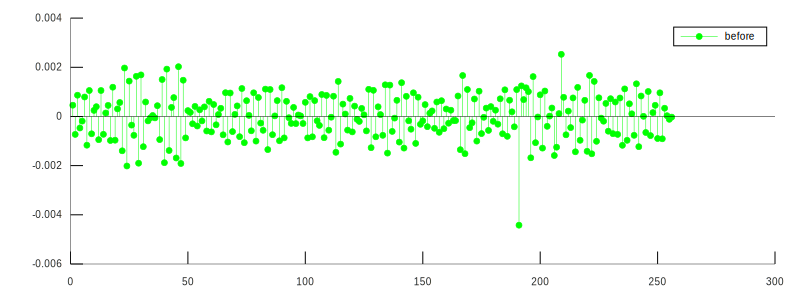

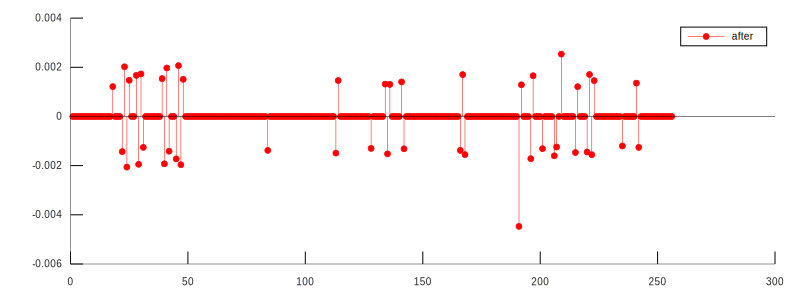

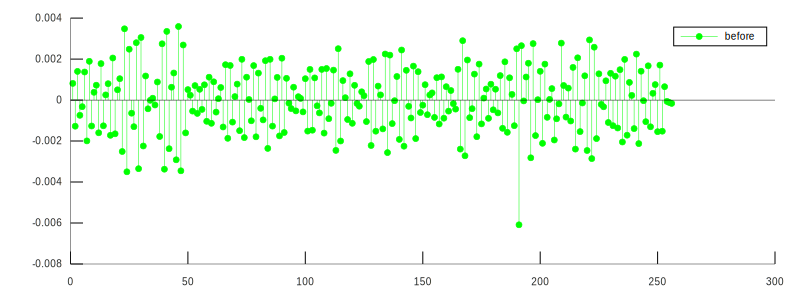

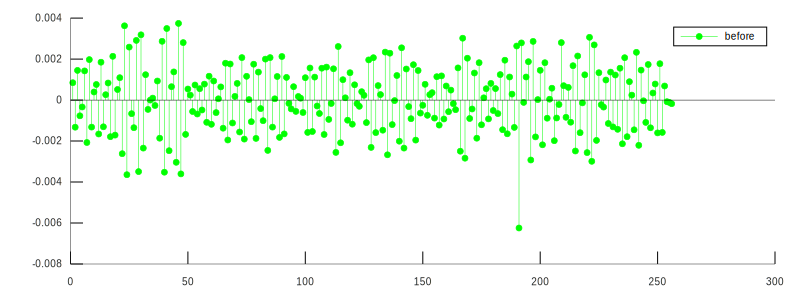

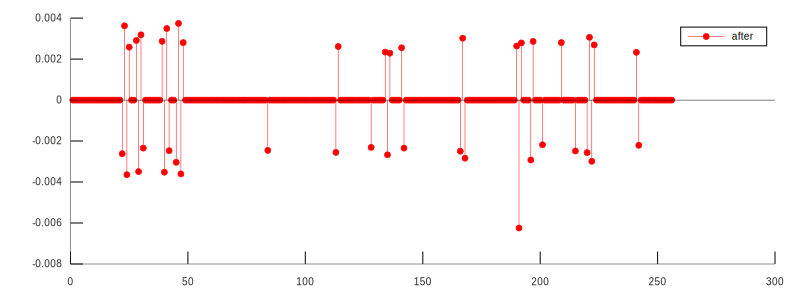

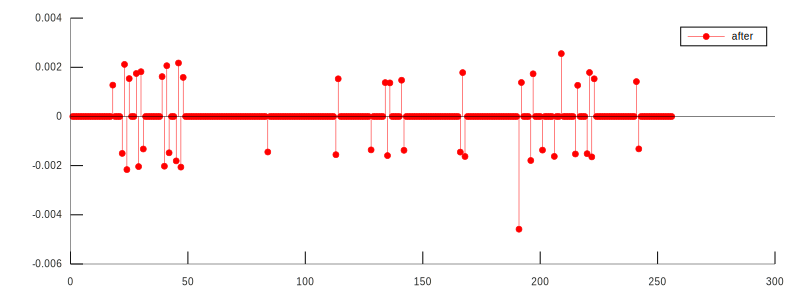

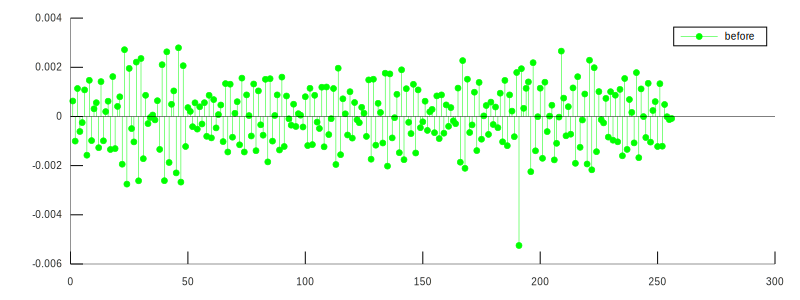

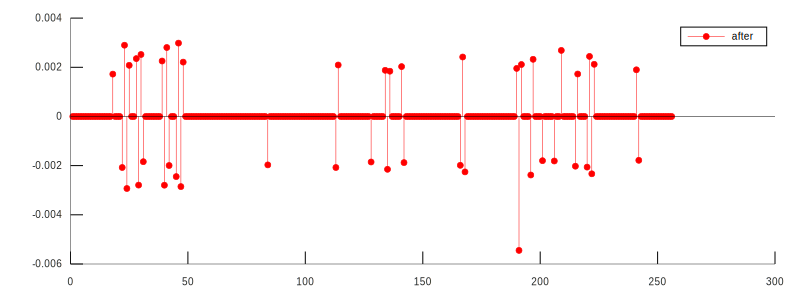

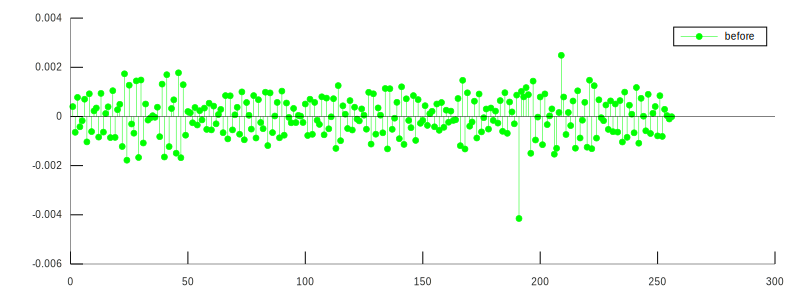

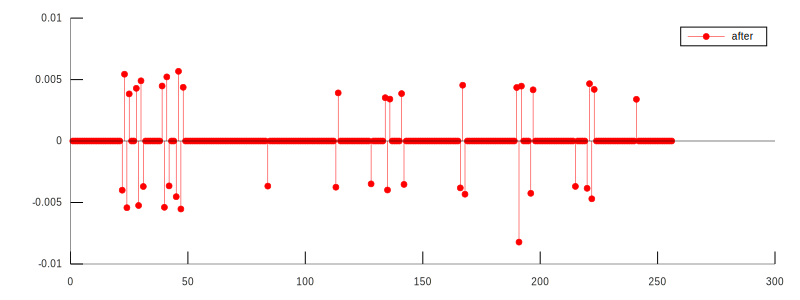

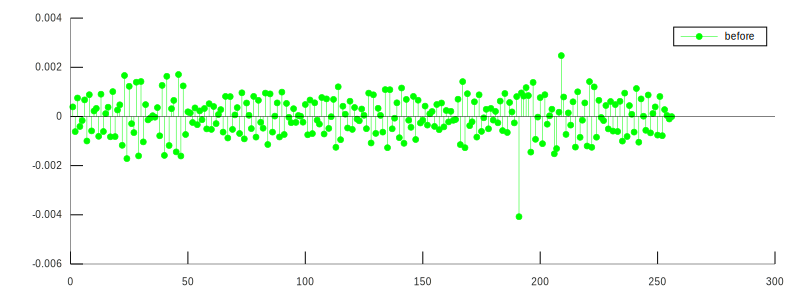

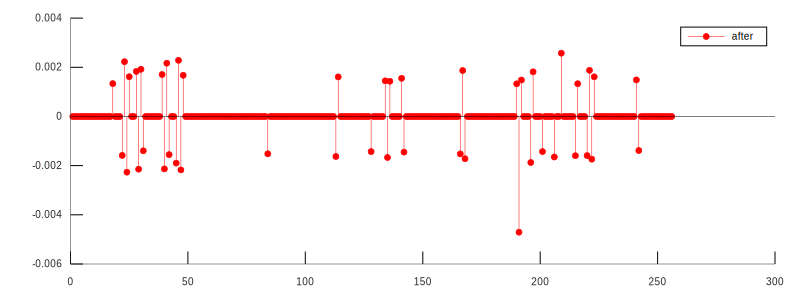

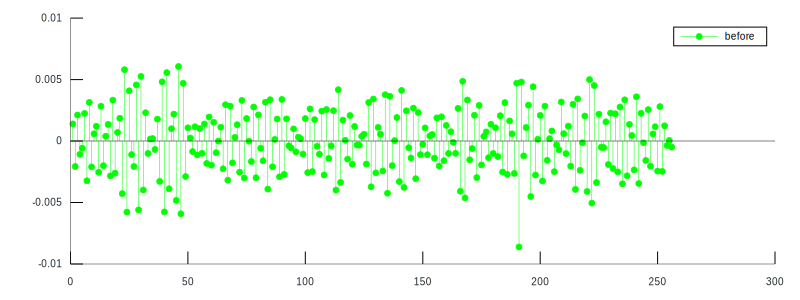

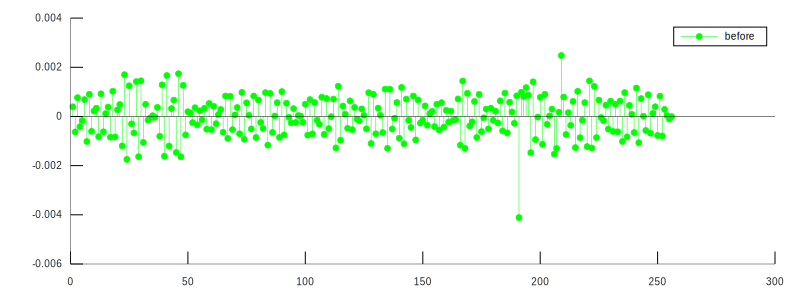

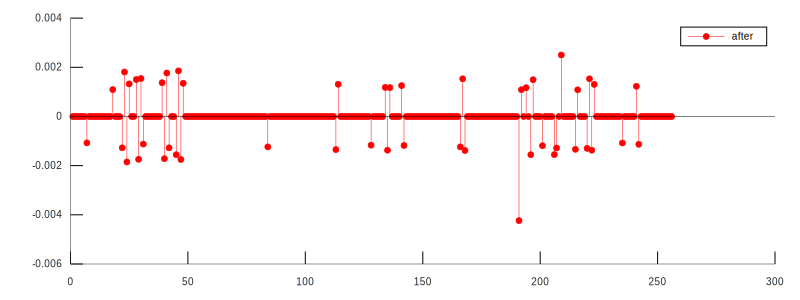

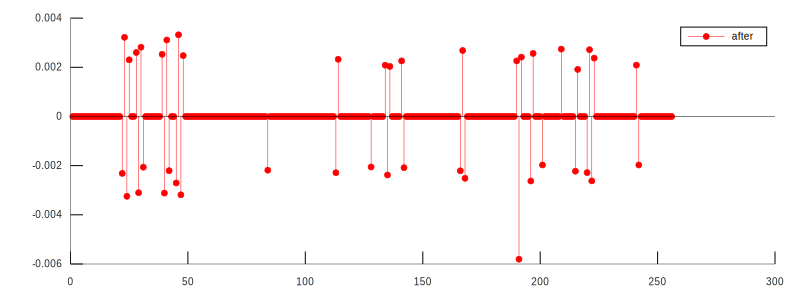

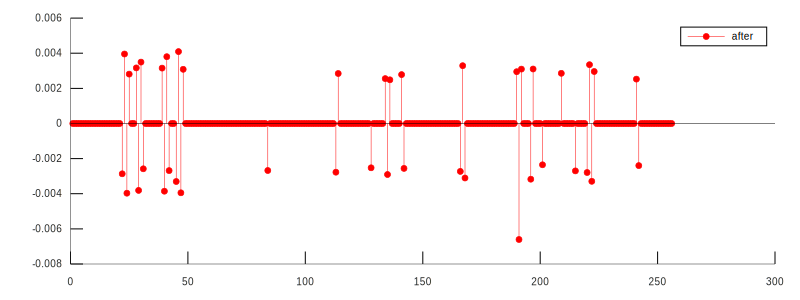

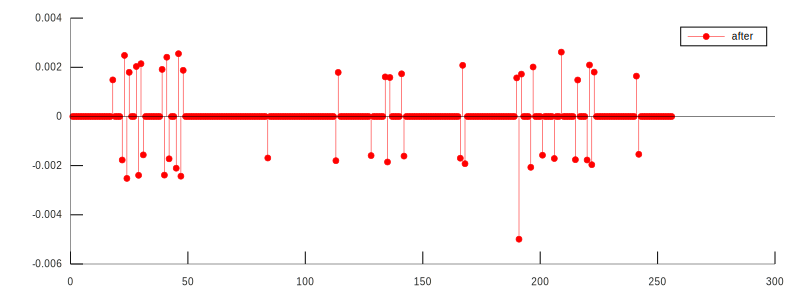

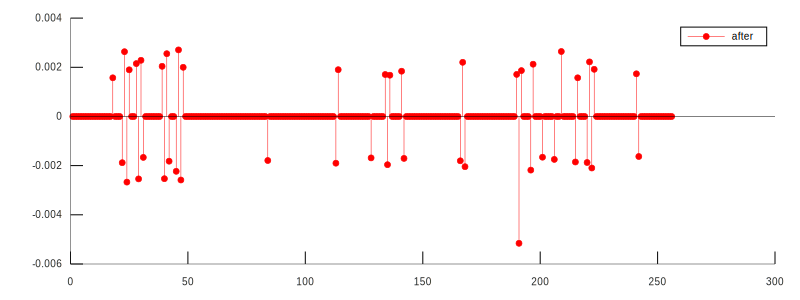

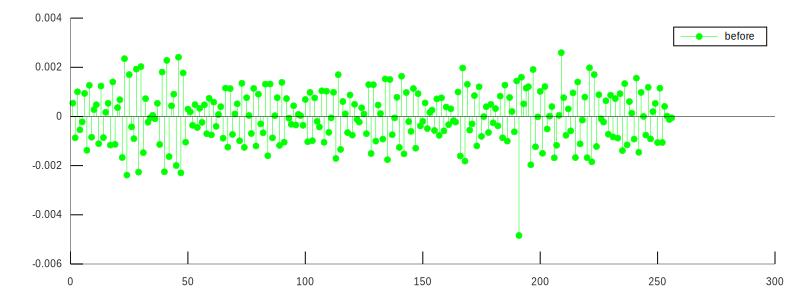

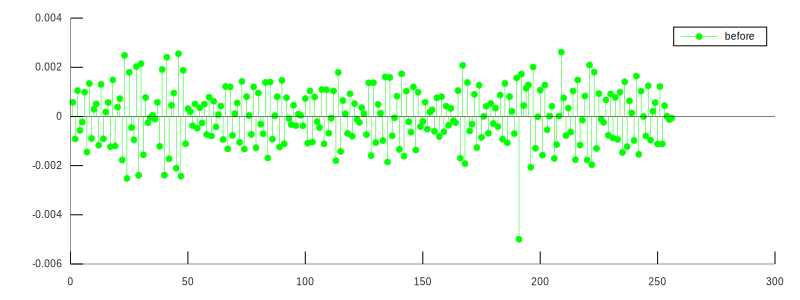

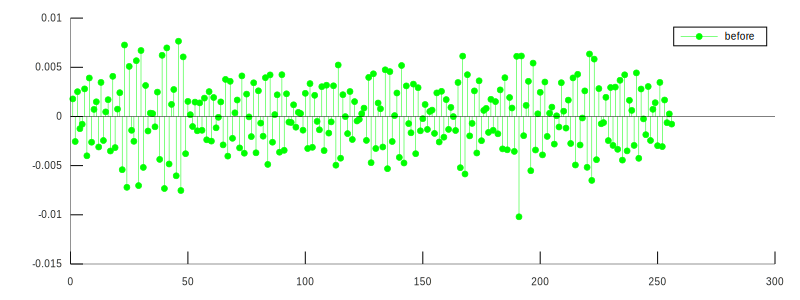

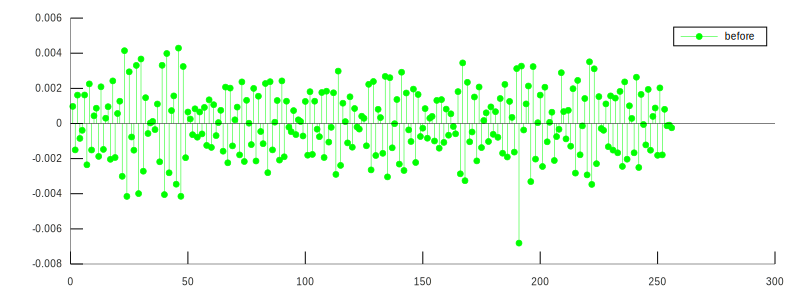

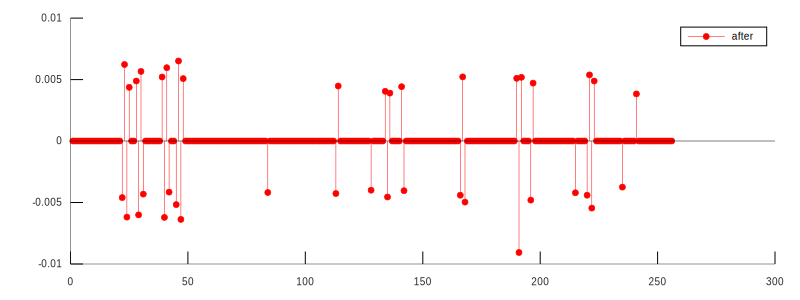

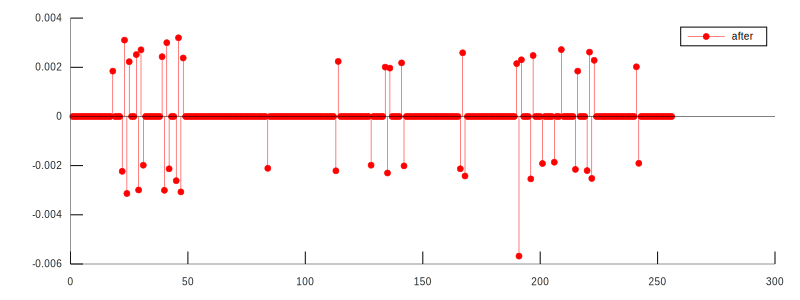

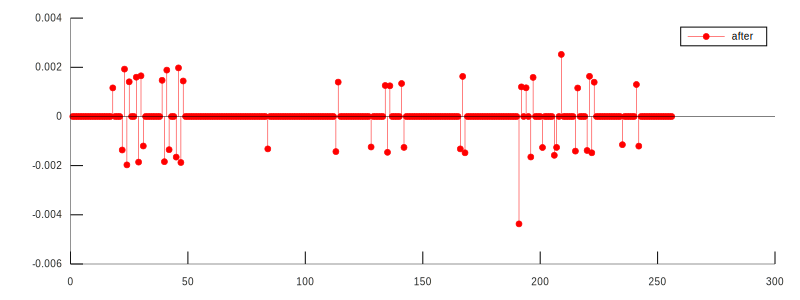

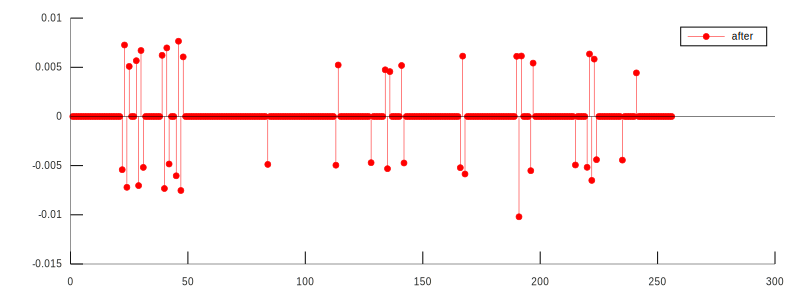

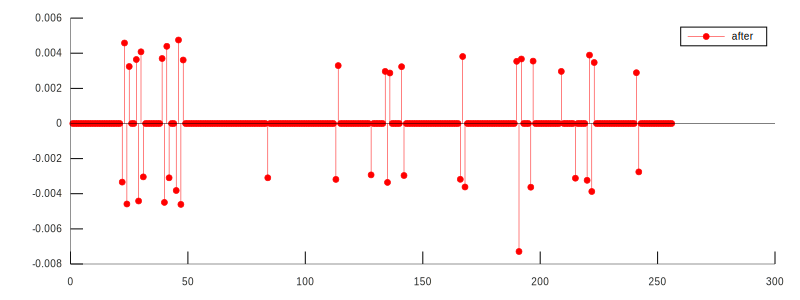

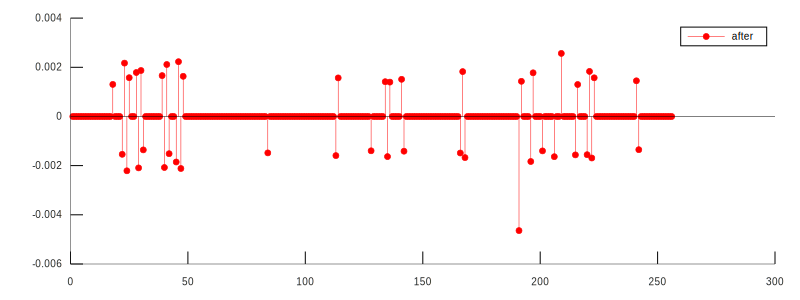

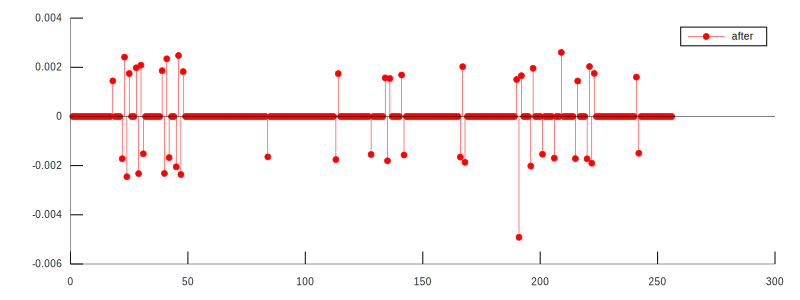

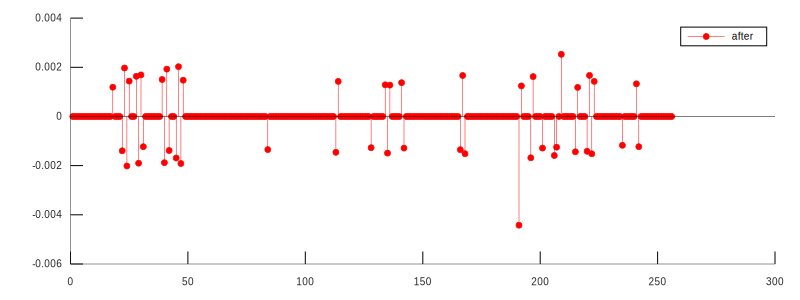

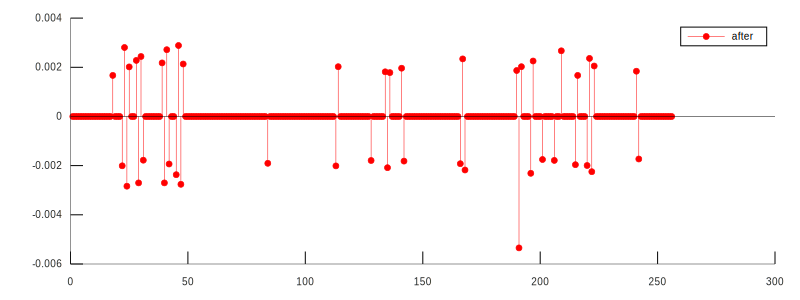

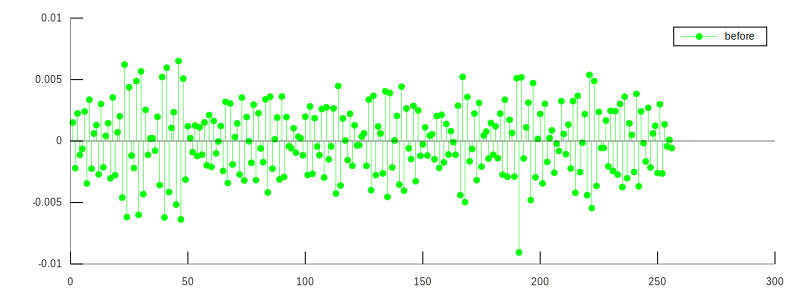

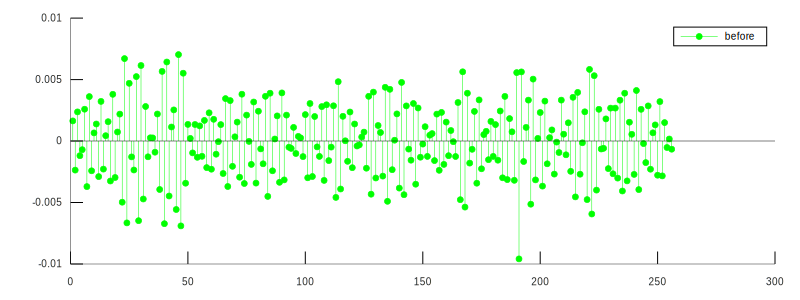

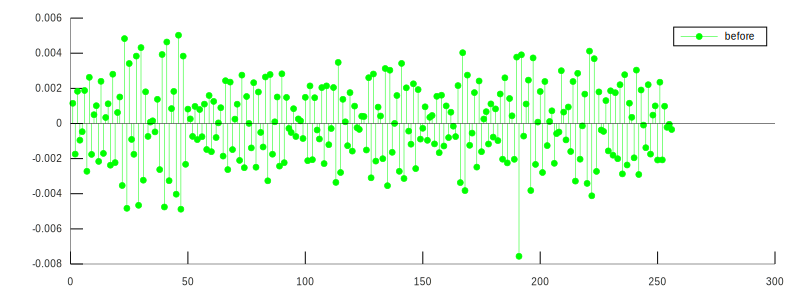

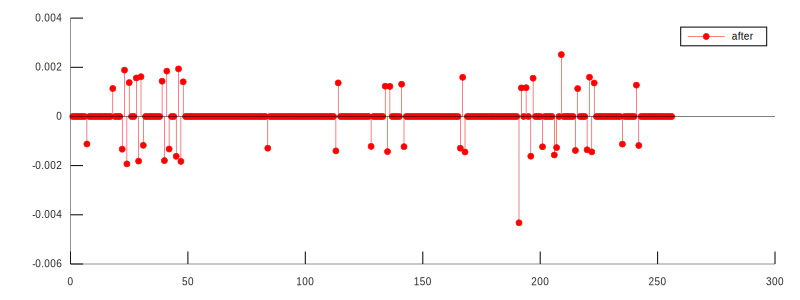

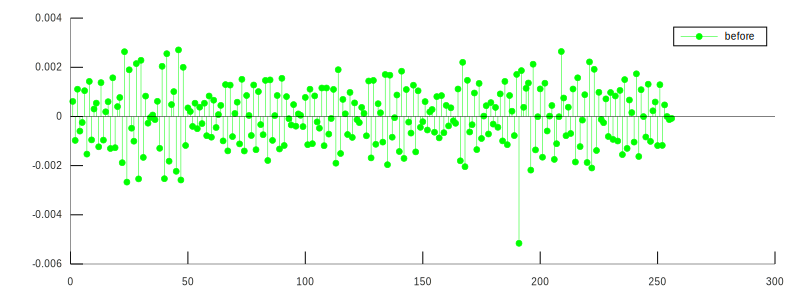

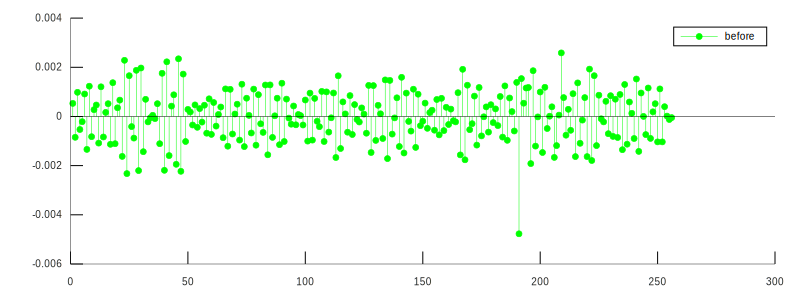

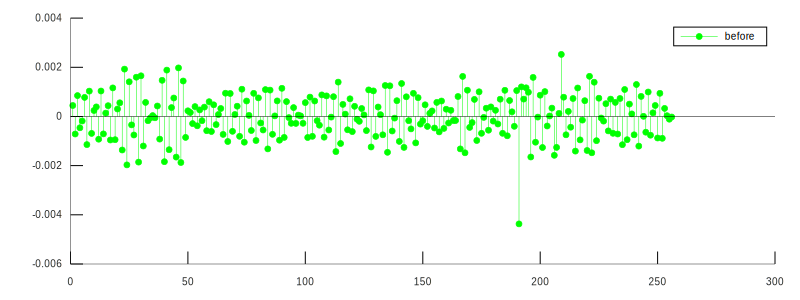

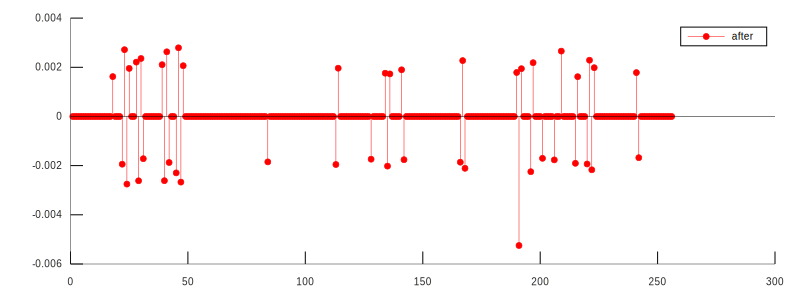

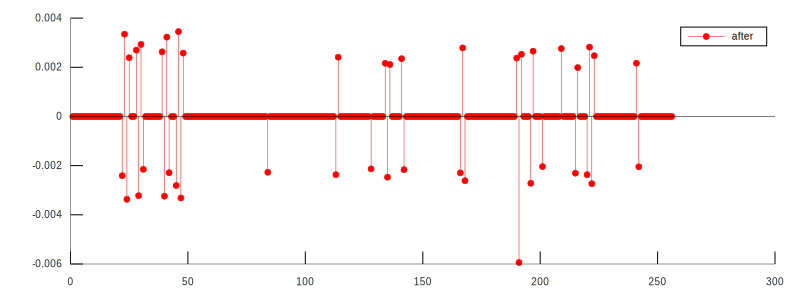

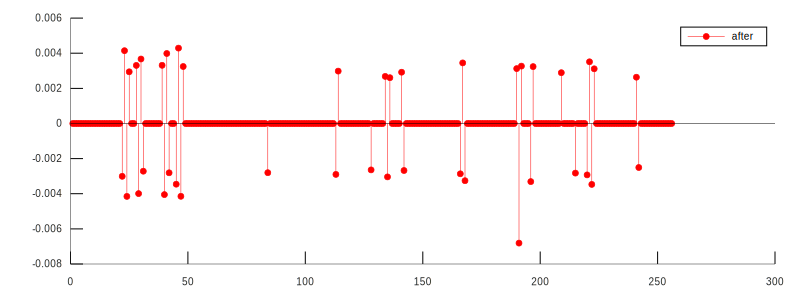

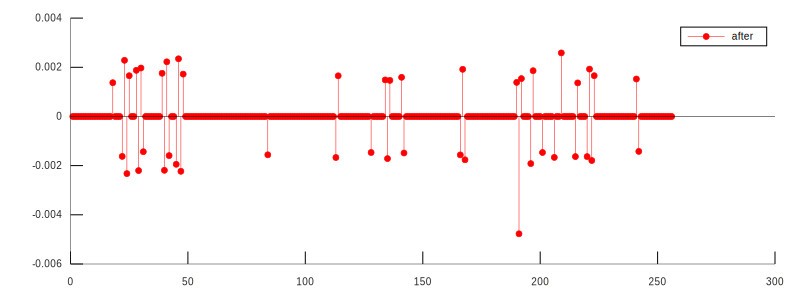

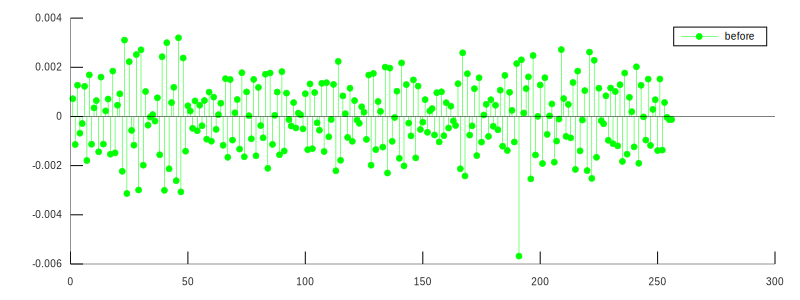

In [45]:
tic
multi_error_level('one',f_wax(ind,:), f_aximp(ind,:), f_ori, w_ori, noise_sd(ind), alphavals, level_now);
toc

Elapsed time is 0.108404 seconds.
Elapsed time is 0.107644 seconds.
Elapsed time is 0.105355 seconds.
Elapsed time is 0.106545 seconds.


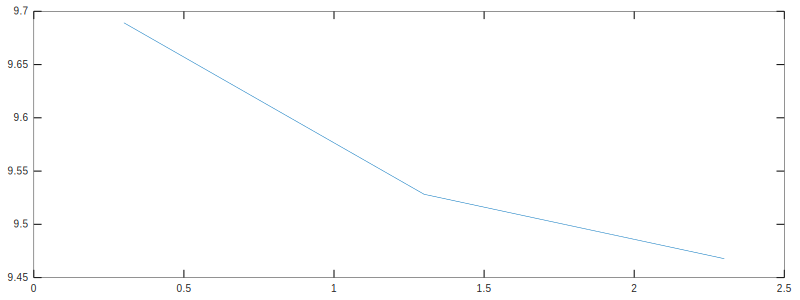

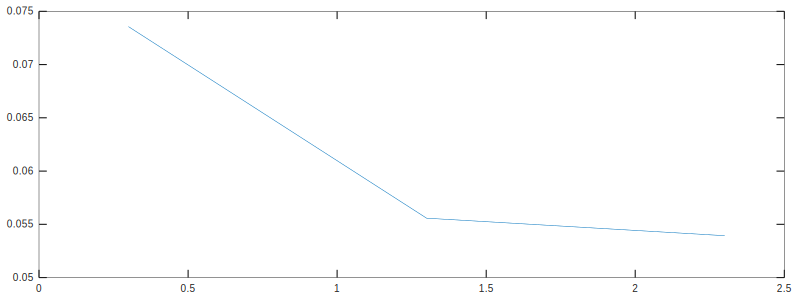

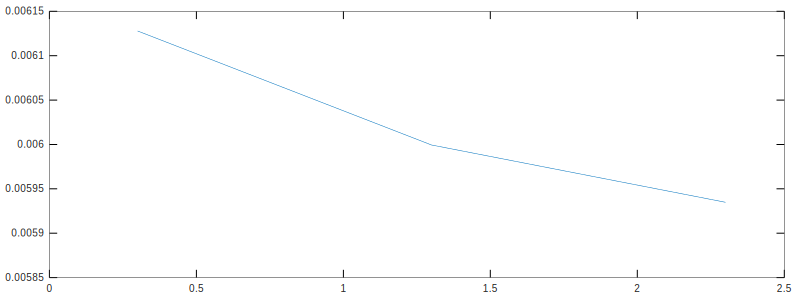

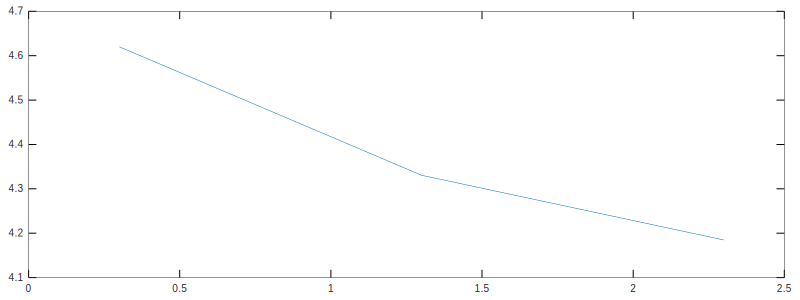

In [18]:
for j=1:p+1
    figure;
    tic
    multi_error_level('one',f_wax, f_aximp, f_ori, w_ori, noise_sd, alphavals, j);
    toc
end

### Why is the error a decreasing function of $\alpha$?

In [19]:
level_now

level_now =  2


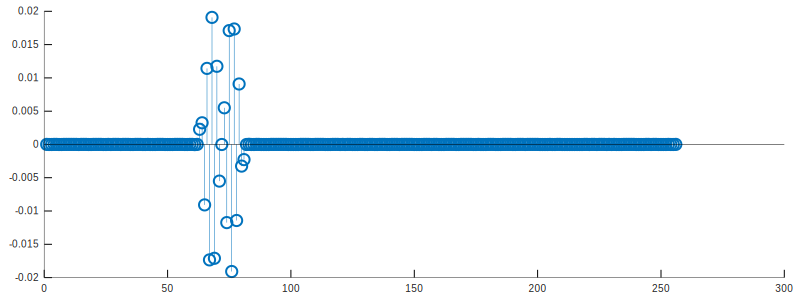

In [20]:
stem(coeff(w_ori, p, level_now))

first_thresval =    9.9136e-04


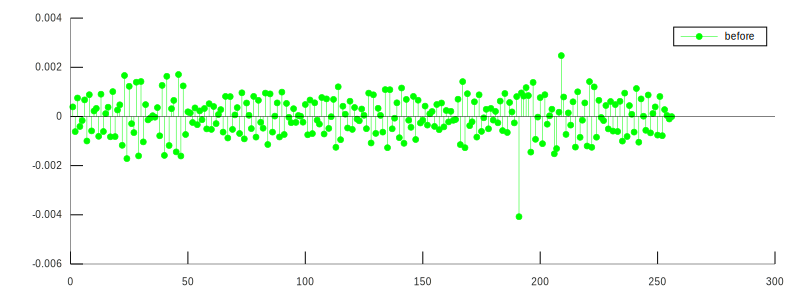

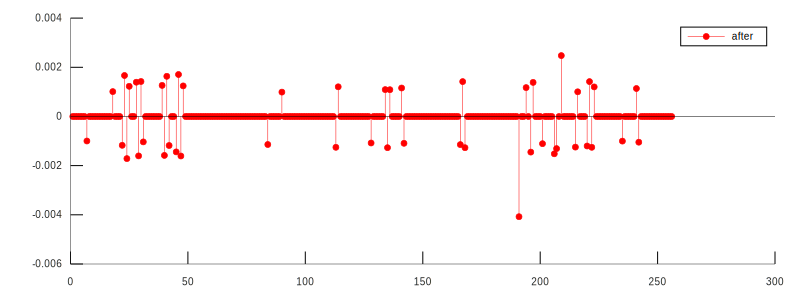

In [41]:
[w_typical, first_unthresratio, first_thresval] = multi_fw_one_level(f_wax(ind,:), f_aximp(ind,:), f_ori, noise_sd(ind), 0.5, level_now);
first_thresval

first_thresval =  0.0014534
